In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

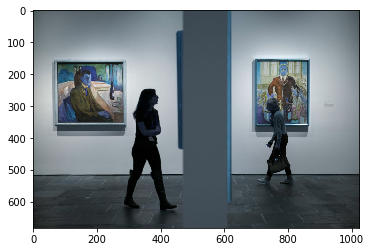

In [61]:
img = cv2.imread("3.jpg")
plt.imshow(img);

In [15]:
imgB, imgG, imgR = cv2.split(img)

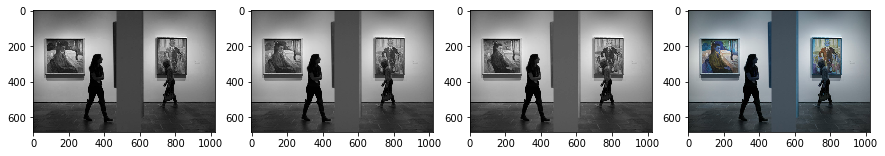

In [19]:
imgP_b, imgP_g, imgP_r = cv2.split(img)

plt.figure(figsize=[15,15])
plt.subplot(141), plt.imshow(imgP_b, 'gray')
plt.subplot(142), plt.imshow(imgP_g, 'gray')
plt.subplot(143), plt.imshow(imgP_r, 'gray')
plt.subplot(144), plt.imshow(img)
plt.show()

In [22]:
b_eq = cv2.equalizeHist(imgP_b)
g_eq = cv2.equalizeHist(imgP_g)
r_eq = cv2.equalizeHist(imgP_r)

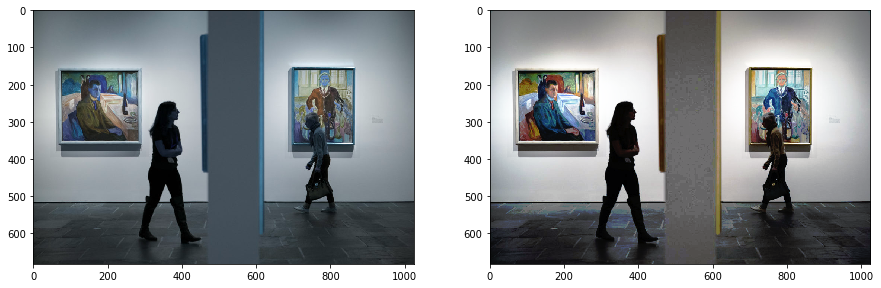

In [27]:
imF = cv2.merge((b_eq, g_eq, r_eq))
imF =  cv2.cvtColor(imF, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[15,15])
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(imF)
plt.show()


In [28]:
def grey_world(nimg):
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    mu_g = np.average(nimg[1])
    nimg[0] = np.minimum(nimg[0] * (mu_g / np.average(nimg[0])), 255)
    nimg[2] = np.minimum(nimg[2] * (mu_g / np.average(nimg[2])), 255)
    return nimg.transpose(1, 2, 0).astype(np.uint8)

In [63]:
# https://stackoverflow.com/questions/46390779/automatic-white-balancing-with-grayworld-assumption/46391574
def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result

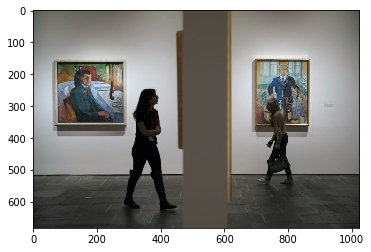

In [62]:
# img = cv2.imread('branco.png')
imGW = white_balance(img)
imGW =  cv2.cvtColor(imGW, cv2.COLOR_BGR2RGB)

plt.imshow(imGW);